In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional


print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


In [2]:
df_init = pd.read_csv('../csv/S2_Urban.csv', sep=';')
print(df_init.head())
print(list(df_init.columns))

   time  10_validity  10_timeliness  10_recall  10_quantity  10_precision  \
0   500            1              1       0.68     1.000000      0.881005   
1  1000            1              1       0.68     0.764706      0.876368   
2  1500            1              1       0.64     0.811765      0.876368   
3  2000            1              1       0.68     0.976471      0.881005   
4  2500            1              1       0.68     0.870588      0.881005   

   10_detail  10_accuracy    10_QoI  10_ThBps  ...  19_ThBps    19_PDR  \
0          1            1  0.599084  1.000000  ...  1.000000  0.499581   
1          1            1  0.455711  0.718093  ...  0.939626  0.528302   
2          1            1  0.455299  0.665959  ...  0.777333  0.528302   
3          1            1  0.584988  0.928435  ...  1.000000  0.504672   
4          1            1  0.521555  0.720004  ...  0.731784  0.455660   

   19_Jitter  19_GWAv  19_Delay    19_QoE    19_QoD  19_thruthfullness  \
0   1.000000      

In [3]:
cols_GWAv = pd.DataFrame()
cols_Jitter = pd.DataFrame()
cols_Delay = pd.DataFrame()
cols_ThBps = pd.DataFrame()
cols_quantity = pd.DataFrame()
cols_PDR = pd.DataFrame()
cols_recall = pd.DataFrame()
cols_QoE = pd.DataFrame()


cols_GWAv = df_init[['10_GWAv','11_GWAv','12_GWAv','13_GWAv','14_GWAv','15_GWAv','16_GWAv','17_GWAv','18_GWAv','19_GWAv']]
cols_Jitter = df_init[['10_Jitter','11_Jitter','12_Jitter','13_Jitter','14_Jitter','15_Jitter','16_Jitter','17_Jitter','18_Jitter','19_Jitter']]
cols_Delay = df_init[['10_Delay','11_Delay','12_Delay','13_Delay','14_Delay','15_Delay','16_Delay','17_Delay','18_Delay','19_Delay']]
cols_ThBps = df_init[['10_ThBps','11_ThBps','12_ThBps','13_ThBps','14_ThBps','15_ThBps','16_ThBps','17_ThBps','18_ThBps','19_ThBps']]
cols_quantity = df_init[['10_quantity','11_quantity','12_quantity','13_quantity','14_quantity','15_quantity','16_quantity','17_quantity','18_quantity','19_quantity']]
cols_PDR = df_init[['10_PDR','11_PDR','12_PDR','13_PDR','14_PDR','15_PDR','16_PDR','17_PDR','18_PDR','19_PDR']]
cols_recall = df_init[['10_recall','11_recall','12_recall','13_recall','14_recall','15_recall','16_recall','17_recall','18_recall','19_recall']]
cols_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]

cols2 = ['GWAv', 'Jitter', 'Delay','ThBps','quantity','PDR','recall','Decision']

df2 = pd.DataFrame(columns=cols2)


In [4]:
aux0 = pd.Series(cols_GWAv['10_GWAv'])
aux1 = pd.Series(cols_GWAv['11_GWAv'])
aux2 = pd.Series(cols_GWAv['12_GWAv'])
aux3 = pd.Series(cols_GWAv['13_GWAv'])
aux4 = pd.Series(cols_GWAv['14_GWAv'])
aux5 = pd.Series(cols_GWAv['15_GWAv'])
aux6 = pd.Series(cols_GWAv['16_GWAv'])
aux7 = pd.Series(cols_GWAv['17_GWAv'])
aux8 = pd.Series(cols_GWAv['18_GWAv'])
aux9 = pd.Series(cols_GWAv['19_GWAv'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['GWAv'] = pd.Series(aux)

[1. 1. 1. ... 1. 1. 1.]


In [5]:
aux0 = pd.Series(cols_Jitter['10_Jitter'])
aux1 = pd.Series(cols_Jitter['11_Jitter'])
aux2 = pd.Series(cols_Jitter['12_Jitter'])
aux3 = pd.Series(cols_Jitter['13_Jitter'])
aux4 = pd.Series(cols_Jitter['14_Jitter'])
aux5 = pd.Series(cols_Jitter['15_Jitter'])
aux6 = pd.Series(cols_Jitter['16_Jitter'])
aux7 = pd.Series(cols_Jitter['17_Jitter'])
aux8 = pd.Series(cols_Jitter['18_Jitter'])
aux9 = pd.Series(cols_Jitter['19_Jitter'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Jitter'] = pd.Series(aux)

[1.         1.         1.         ... 0.89294216 0.78839421 0.85753849]


In [6]:
aux0 = pd.Series(cols_Delay['10_Delay'])
aux1 = pd.Series(cols_Delay['11_Delay'])
aux2 = pd.Series(cols_Delay['12_Delay'])
aux3 = pd.Series(cols_Delay['13_Delay'])
aux4 = pd.Series(cols_Delay['14_Delay'])
aux5 = pd.Series(cols_Delay['15_Delay'])
aux6 = pd.Series(cols_Delay['16_Delay'])
aux7 = pd.Series(cols_Delay['17_Delay'])
aux8 = pd.Series(cols_Delay['18_Delay'])
aux9 = pd.Series(cols_Delay['19_Delay'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Delay'] = pd.Series(aux)

[1.         0.99720537 0.94650301 ... 0.84346021 0.74539799 0.81603974]


In [7]:
aux0 = pd.Series(cols_ThBps['10_ThBps'])
aux1 = pd.Series(cols_ThBps['11_ThBps'])
aux2 = pd.Series(cols_ThBps['12_ThBps'])
aux3 = pd.Series(cols_ThBps['13_ThBps'])
aux4 = pd.Series(cols_ThBps['14_ThBps'])
aux5 = pd.Series(cols_ThBps['15_ThBps'])
aux6 = pd.Series(cols_ThBps['16_ThBps'])
aux7 = pd.Series(cols_ThBps['17_ThBps'])
aux8 = pd.Series(cols_ThBps['18_ThBps'])
aux9 = pd.Series(cols_ThBps['19_ThBps'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['ThBps'] = pd.Series(aux)

[1.         0.71809301 0.6659588  ... 0.70969203 0.61902174 0.70869565]


In [8]:
aux0 = pd.Series(cols_quantity['10_quantity'])
aux1 = pd.Series(cols_quantity['11_quantity'])
aux2 = pd.Series(cols_quantity['12_quantity'])
aux3 = pd.Series(cols_quantity['13_quantity'])
aux4 = pd.Series(cols_quantity['14_quantity'])
aux5 = pd.Series(cols_quantity['15_quantity'])
aux6 = pd.Series(cols_quantity['16_quantity'])
aux7 = pd.Series(cols_quantity['17_quantity'])
aux8 = pd.Series(cols_quantity['18_quantity'])
aux9 = pd.Series(cols_quantity['19_quantity'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['quantity'] = pd.Series(aux)

[1.         0.76470588 0.81176471 ... 0.82653061 0.73469388 0.80612245]


In [9]:
aux0 = pd.Series(cols_PDR['10_PDR'])
aux1 = pd.Series(cols_PDR['11_PDR'])
aux2 = pd.Series(cols_PDR['12_PDR'])
aux3 = pd.Series(cols_PDR['13_PDR'])
aux4 = pd.Series(cols_PDR['14_PDR'])
aux5 = pd.Series(cols_PDR['15_PDR'])
aux6 = pd.Series(cols_PDR['16_PDR'])
aux7 = pd.Series(cols_PDR['17_PDR'])
aux8 = pd.Series(cols_PDR['18_PDR'])
aux9 = pd.Series(cols_PDR['19_PDR'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['PDR'] = pd.Series(aux)

[0.49371069 0.42138365 0.41163522 ... 0.50121294 0.43333133 0.481177  ]


In [10]:
aux0 = pd.Series(cols_recall['10_recall'])
aux1 = pd.Series(cols_recall['11_recall'])
aux2 = pd.Series(cols_recall['12_recall'])
aux3 = pd.Series(cols_recall['13_recall'])
aux4 = pd.Series(cols_recall['14_recall'])
aux5 = pd.Series(cols_recall['15_recall'])
aux6 = pd.Series(cols_recall['16_recall'])
aux7 = pd.Series(cols_recall['17_recall'])
aux8 = pd.Series(cols_recall['18_recall'])
aux9 = pd.Series(cols_recall['19_recall'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['recall'] = pd.Series(aux)

[0.68 0.68 0.64 ... 0.68 0.68 0.68]


In [11]:
aux0 = pd.Series(cols_QoE['10_QoE'])
aux1 = pd.Series(cols_QoE['11_QoE'])
aux2 = pd.Series(cols_QoE['12_QoE'])
aux3 = pd.Series(cols_QoE['13_QoE'])
aux4 = pd.Series(cols_QoE['14_QoE'])
aux5 = pd.Series(cols_QoE['15_QoE'])
aux6 = pd.Series(cols_QoE['16_QoE'])
aux7 = pd.Series(cols_QoE['17_QoE'])
aux8 = pd.Series(cols_QoE['18_QoE'])
aux9 = pd.Series(cols_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Decision'] = pd.Series(aux)

[0.49371069 0.30174702 0.25946686 ... 0.26790457 0.15763681 0.23863248]


In [12]:
print(df2)

       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall  \
0       1.0  1.000000  1.000000  1.000000  1.000000  0.493711    0.68   
1       1.0  1.000000  0.997205  0.718093  0.764706  0.421384    0.68   
2       1.0  1.000000  0.946503  0.665959  0.811765  0.411635    0.64   
3       1.0  0.927760  1.000000  0.928435  0.976471  0.502639    0.68   
4       1.0  0.874111  0.846741  0.720004  0.870588  0.516667    0.68   
...     ...       ...       ...       ...       ...       ...     ...   
14395   1.0  0.833704  0.738840  0.576902  0.724490  0.433705    0.64   
14396   1.0  0.785765  0.806819  0.669837  0.724490  0.409118    0.68   
14397   1.0  0.892942  0.843460  0.709692  0.826531  0.501213    0.68   
14398   1.0  0.788394  0.745398  0.619022  0.734694  0.433331    0.68   
14399   1.0  0.857538  0.816040  0.708696  0.806122  0.481177    0.68   

       Decision  
0      0.493711  
1      0.301747  
2      0.259467  
3      0.432956  
4      0.275336  
...         ...

[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


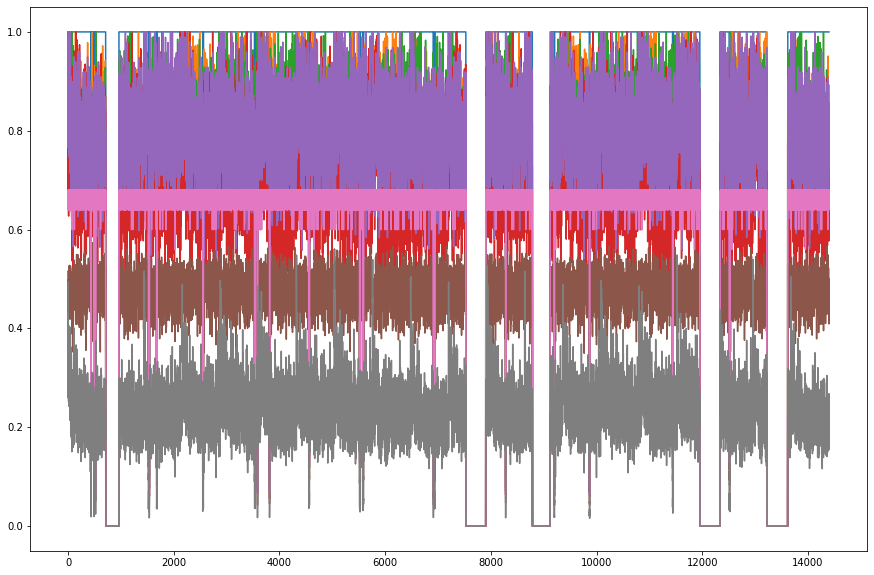

In [13]:
random.seed(42)

lent = df2['GWAv'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df2[init1[i]:init1[i]+leng1[i]] = df2[init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df2[init2[i]:init2[i]+leng2[i]] = df2[init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df2[init3[i]:init3[i]+leng3[i]] = df2[init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(df2)
plt.show()

In [14]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [15]:
for i in range(0,df2.shape[0]):
    if(df2['Decision'][i] >=0.8 and df2['Decision'][i] <=1):
        df2['Decision'][i] = 5
    if(df2['Decision'][i] <0.8 and df2['Decision'][i]>=0.6):
        df2['Decision'][i] = 4   
    if(df2['Decision'][i] <0.6 and df2['Decision'][i]>=0.4):
        df2['Decision'][i] = 3
    if(df2['Decision'][i] <0.4 and df2['Decision'][i]>=0.2):
        df2['Decision'][i] = 2
    if(df2['Decision'][i] <0.2 and df2['Decision'][i]>=0):
        df2['Decision'][i] = 1  
        

In [16]:
print(df2.columns)
df_decision = df2['Decision']
df2 = df2.drop(['Decision'],axis=1)
print(df2)




Index(['GWAv', 'Jitter', 'Delay', 'ThBps', 'quantity', 'PDR', 'recall',
       'Decision'],
      dtype='object')
       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall
0       1.0  1.000000  1.000000  1.000000  1.000000  0.493711    0.68
1       1.0  1.000000  0.997205  0.718093  0.764706  0.421384    0.68
2       1.0  1.000000  0.946503  0.665959  0.811765  0.411635    0.64
3       1.0  0.927760  1.000000  0.928435  0.976471  0.502639    0.68
4       1.0  0.874111  0.846741  0.720004  0.870588  0.516667    0.68
...     ...       ...       ...       ...       ...       ...     ...
14395   1.0  0.833704  0.738840  0.576902  0.724490  0.433705    0.64
14396   1.0  0.785765  0.806819  0.669837  0.724490  0.409118    0.68
14397   1.0  0.892942  0.843460  0.709692  0.826531  0.501213    0.68
14398   1.0  0.788394  0.745398  0.619022  0.734694  0.433331    0.68
14399   1.0  0.857538  0.816040  0.708696  0.806122  0.481177    0.68

[14400 rows x 7 columns]


In [17]:
df2_train, df2_test, dec_train, dec_test = train_test_split(df2, df_decision, test_size=0.25, shuffle=False, random_state=42)


In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
df2_train = df2_train.fillna(df2_train.mean(axis=0),axis=0)
clf_train = clf.fit(df2_train, dec_train)
dec_test = dec_test.to_numpy();
yhat = clf_train.predict(df2_test)
print(yhat)


[3. 3. 3. ... 2. 1. 2.]


In [19]:
print(len(yhat))
print(len(dec_test))

comp = {'yhat': yhat, 'y_test': dec_test}
df_comp = pd.DataFrame(data=comp)
print(df_comp)

3600
3600
      yhat  y_test
0      3.0     3.0
1      3.0     3.0
2      3.0     3.0
3      2.0     2.0
4      3.0     3.0
...    ...     ...
3595   1.0     1.0
3596   1.0     1.0
3597   2.0     2.0
3598   1.0     1.0
3599   2.0     2.0

[3600 rows x 2 columns]


In [20]:
min = 0
count = 0;
notif_paper = []
notif2_paper = []

th = 0.5


for i in range(0,len(yhat)):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif_paper.append(0)
        notif2_paper.append(0)
    else:
        if(yhat[i] < dec_train[i-1]*th):
            notif_paper.append(1)
        else:
            notif_paper.append(0)
        
        if(dec_train[i] < dec_train[i-1]*th or dec_train[i] <=2):
            notif2_paper.append(1)
        else:
            notif2_paper.append(0)    



In [21]:
df_QoI = pd.DataFrame()
df_QoE = pd.DataFrame()
df_QoD = pd.DataFrame()
cols = ['QoE', 'QoI', 'QoD']
df = pd.DataFrame(columns=cols)
print(df)

Empty DataFrame
Columns: [QoE, QoI, QoD]
Index: []


In [22]:
df_QoI = df_init[['10_QoI','11_QoI','12_QoI','13_QoI','14_QoI','15_QoI','16_QoI','17_QoI','18_QoI','19_QoI']]
df_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]
df_QoD = df_init[['10_QoD','11_QoD','12_QoD','13_QoD','14_QoD','15_QoD','16_QoD','17_QoD','18_QoD','19_QoD']]

In [23]:
print(df_QoE)

       10_QoE    11_QoE    12_QoE    13_QoE    14_QoE    15_QoE    16_QoE  \
0    0.493711  0.493531  0.516173  0.460692  0.496855  0.486164  0.548113   
1    0.301747  0.448830  0.511950  0.489465  0.477725  0.465103  0.459216   
2    0.259467  0.528371  0.357325  0.333933  0.482377  0.462140  0.427673   
3    0.432956  0.378637  0.338836  0.376414  0.329612  0.346070  0.201526   
4    0.275336  0.308848  0.356556  0.380840  0.410236  0.433863  0.268058   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.218814  0.228081  0.226383  0.229934  0.265734  0.188394  0.221010   
716  0.193575  0.240611  0.205175  0.275873  0.214354  0.238150  0.266545   
717  0.295063  0.192424  0.271039  0.192927  0.227227  0.247691  0.219771   
718  0.188335  0.267514  0.257207  0.204539  0.295600  0.239738  0.280573   
719  0.309940  0.264320  0.245489  0.193084  0.236630  0.154376  0.318711   

       17_QoE    18_QoE    19_QoE  
0    0.560535  0.538994  0.499581  
1  

In [24]:
aux0 = pd.Series(df_QoE['10_QoE'])
aux1 = pd.Series(df_QoE['11_QoE'])
aux2 = pd.Series(df_QoE['12_QoE'])
aux3 = pd.Series(df_QoE['13_QoE'])
aux4 = pd.Series(df_QoE['14_QoE'])
aux5 = pd.Series(df_QoE['15_QoE'])
aux6 = pd.Series(df_QoE['16_QoE'])
aux7 = pd.Series(df_QoE['17_QoE'])
aux8 = pd.Series(df_QoE['18_QoE'])
aux9 = pd.Series(df_QoE['19_QoE'])
aux10 = pd.Series(df_QoE['10_QoE'])
aux11 = pd.Series(df_QoE['11_QoE'])
aux12 = pd.Series(df_QoE['12_QoE'])
aux13 = pd.Series(df_QoE['13_QoE'])
aux14 = pd.Series(df_QoE['14_QoE'])
aux15 = pd.Series(df_QoE['15_QoE'])
aux16 = pd.Series(df_QoE['16_QoE'])
aux17 = pd.Series(df_QoE['17_QoE'])
aux18 = pd.Series(df_QoE['18_QoE'])
aux19 = pd.Series(df_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoE'] = pd.Series(aux)




[0.49371069 0.30174702 0.25946686 ... 0.26790457 0.15763681 0.23863248]


In [25]:
print(df)

            QoE  QoI  QoD
0      0.493711  NaN  NaN
1      0.301747  NaN  NaN
2      0.259467  NaN  NaN
3      0.432956  NaN  NaN
4      0.275336  NaN  NaN
...         ...  ...  ...
14395  0.154120  NaN  NaN
14396  0.173735  NaN  NaN
14397  0.267905  NaN  NaN
14398  0.157637  NaN  NaN
14399  0.238632  NaN  NaN

[14400 rows x 3 columns]


In [26]:
aux0 = pd.Series(df_QoI['10_QoI'])
aux1 = pd.Series(df_QoI['11_QoI'])
aux2 = pd.Series(df_QoI['12_QoI'])
aux3 = pd.Series(df_QoI['13_QoI'])
aux4 = pd.Series(df_QoI['14_QoI'])
aux5 = pd.Series(df_QoI['15_QoI'])
aux6 = pd.Series(df_QoI['16_QoI'])
aux7 = pd.Series(df_QoI['17_QoI'])
aux8 = pd.Series(df_QoI['18_QoI'])
aux9 = pd.Series(df_QoI['19_QoI'])
aux10 = pd.Series(df_QoI['10_QoI'])
aux11 = pd.Series(df_QoI['11_QoI'])
aux12 = pd.Series(df_QoI['12_QoI'])
aux13 = pd.Series(df_QoI['13_QoI'])
aux14 = pd.Series(df_QoI['14_QoI'])
aux15 = pd.Series(df_QoI['15_QoI'])
aux16 = pd.Series(df_QoI['16_QoI'])
aux17 = pd.Series(df_QoI['17_QoI'])
aux18 = pd.Series(df_QoI['18_QoI'])
aux19 = pd.Series(df_QoI['19_QoI'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoI'] = pd.Series(aux)


[0.59908359 0.45571134 0.45529893 ... 0.49255457 0.44239523 0.48293473]


In [27]:
print(df)

            QoE       QoI  QoD
0      0.493711  0.599084  NaN
1      0.301747  0.455711  NaN
2      0.259467  0.455299  NaN
3      0.432956  0.584988  NaN
4      0.275336  0.521555  NaN
...         ...       ...  ...
14395  0.154120  0.406349  NaN
14396  0.173735  0.436251  NaN
14397  0.267905  0.492555  NaN
14398  0.157637  0.442395  NaN
14399  0.238632  0.482935  NaN

[14400 rows x 3 columns]


In [28]:
aux0 = pd.Series(df_QoD['10_QoD'])
aux1 = pd.Series(df_QoD['11_QoD'])
aux2 = pd.Series(df_QoD['12_QoD'])
aux3 = pd.Series(df_QoD['13_QoD'])
aux4 = pd.Series(df_QoD['14_QoD'])
aux5 = pd.Series(df_QoD['15_QoD'])
aux6 = pd.Series(df_QoD['16_QoD'])
aux7 = pd.Series(df_QoD['17_QoD'])
aux8 = pd.Series(df_QoD['18_QoD'])
aux9 = pd.Series(df_QoD['19_QoD'])
aux10 = pd.Series(df_QoD['10_QoD'])
aux11 = pd.Series(df_QoD['11_QoD'])
aux12 = pd.Series(df_QoD['12_QoD'])
aux13 = pd.Series(df_QoD['13_QoD'])
aux14 = pd.Series(df_QoD['14_QoD'])
aux15 = pd.Series(df_QoD['15_QoD'])
aux16 = pd.Series(df_QoD['16_QoD'])
aux17 = pd.Series(df_QoD['17_QoD'])
aux18 = pd.Series(df_QoD['18_QoD'])
aux19 = pd.Series(df_QoD['19_QoD'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoD'] = pd.Series(aux)


[0.08217139 0.4548433  0.59764716 ... 0.58352385 0.60198045 0.59587436]


In [29]:
print(df)
df_bup = df

            QoE       QoI       QoD
0      0.493711  0.599084  0.082171
1      0.301747  0.455711  0.454843
2      0.259467  0.455299  0.597647
3      0.432956  0.584988  0.598282
4      0.275336  0.521555  0.598640
...         ...       ...       ...
14395  0.154120  0.406349  0.580812
14396  0.173735  0.436251  0.605069
14397  0.267905  0.492555  0.583524
14398  0.157637  0.442395  0.601980
14399  0.238632  0.482935  0.595874

[14400 rows x 3 columns]


In [30]:
var_x = np.linspace(0.0, df.shape[0]-1, num=df.shape[0])
print(var_x)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.4397e+04 1.4398e+04 1.4399e+04]


In [31]:
print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


[6429, 10085, 670, 13026, 6857, 10790, 387, 1678, 10, 4322]
[6, 2, 7, 9, 8, 10, 6, 5, 9, 7]
-----------------------------
[5883, 7245, 3965, 544, 9190, 6130, 11742, 11265, 5790, 9846]
[17, 18, 10, 15, 19, 16, 13, 13, 18, 18]
-----------------------------
[12920, 13772, 11946, 578, 2056]
[375, 485, 494, 300, 322]
-----------------------------


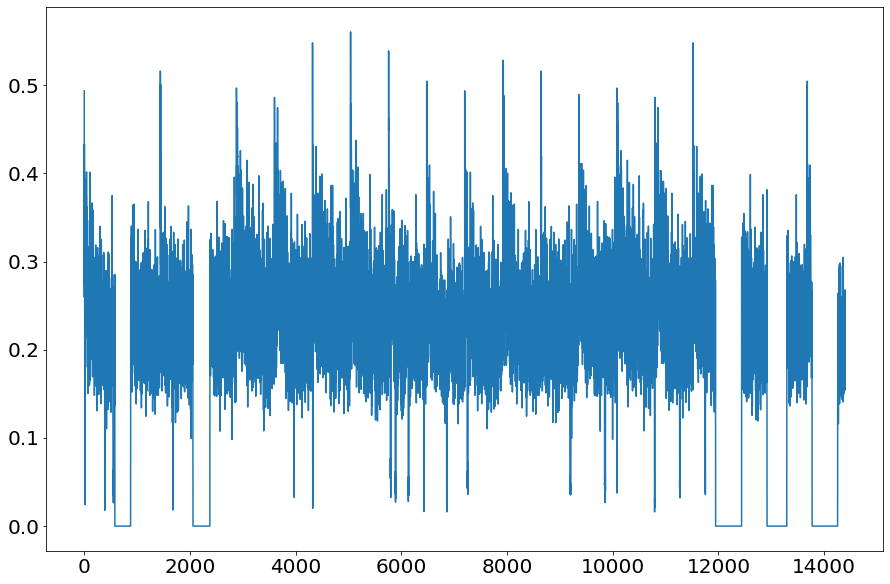

In [32]:
random.seed(47)

lent = df['QoE'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoE'][init1[i]:init1[i]+leng1[i]] = df['QoE'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoE'][init2[i]:init2[i]+leng2[i]] = df['QoE'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoE'][init3[i]:init3[i]+leng3[i]] = df['QoE'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoE'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[13195, 14367, 4264, 7373, 13171, 10081, 6865, 4651, 14284, 9502]
[10, 4, 4, 4, 1, 4, 8, 7, 6, 5]
-----------------------------
[10812, 6026, 1013, 1657, 12832, 10935, 12742, 2206, 4945, 567]
[11, 10, 17, 13, 17, 11, 17, 18, 20, 16]
-----------------------------
[12472, 11138, 1239, 2600, 3300]
[294, 350, 358, 288, 324]
-----------------------------


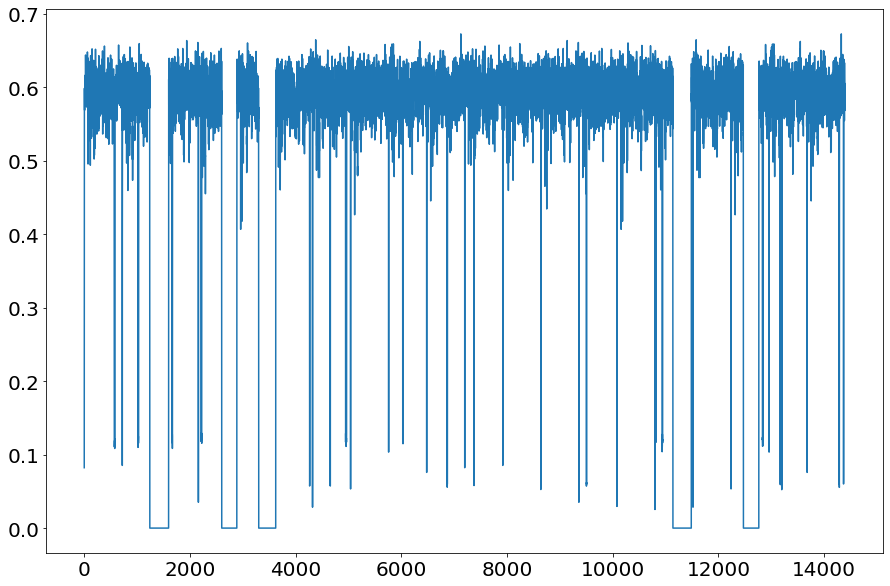

In [33]:
random.seed(58)

lent = df['QoD'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoD'][init1[i]:init1[i]+leng1[i]] = df['QoD'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoD'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoD'][init2[i]:init2[i]+leng2[i]] = df['QoD'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoD'][init3[i]:init3[i]+leng3[i]] = df['QoD'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoD'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[4555, 3338, 10548, 651, 10901, 2896, 4718, 573, 2588, 7200]
[2, 2, 7, 8, 7, 5, 10, 7, 8, 10]
-----------------------------
[6514, 10648, 8627, 12017, 11547, 2631, 2502, 6076, 8507, 107]
[12, 11, 20, 11, 17, 14, 13, 16, 19, 10]
-----------------------------
[2623, 7129, 9188, 13245, 46]
[427, 319, 399, 220, 383]
-----------------------------


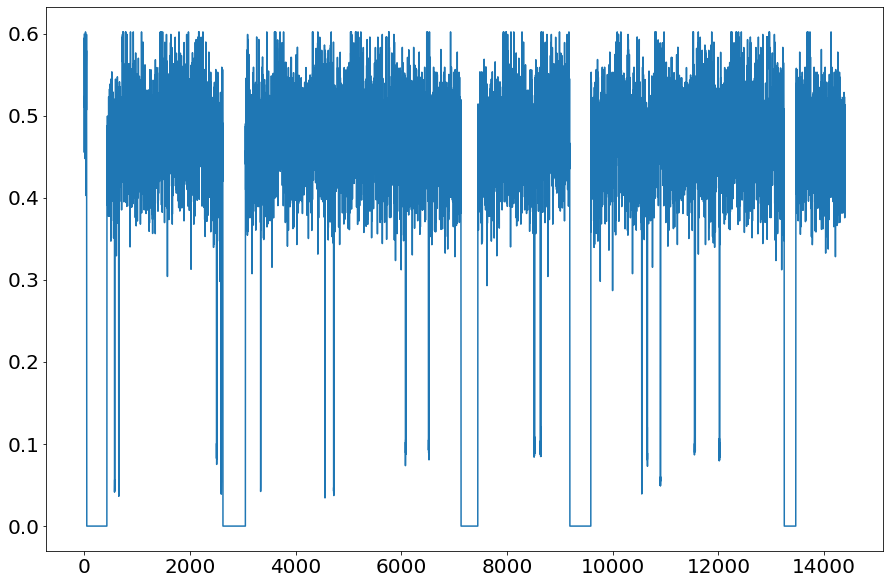

In [34]:
random.seed(67)

lent = df['QoI'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoI'][init1[i]:init1[i]+leng1[i]] = df['QoI'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoI'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoI'][init2[i]:init2[i]+leng2[i]] = df['QoI'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoI'][init3[i]:init3[i]+leng3[i]] = df['QoI'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoI'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[3896, 2383, 9107, 10332, 10831, 8202, 39, 13944, 4586, 464]
[5, 6, 4, 4, 4, 2, 5, 8, 9, 10]
-----------------------------
[9027, 12758, 4265, 8748, 7694, 3358, 3696, 3140, 1177, 1326]
[17, 12, 13, 18, 16, 12, 15, 15, 11, 11]
-----------------------------
[1635, 13754, 13130, 11589, 12119]
[302, 486, 424, 475, 239]
-----------------------------


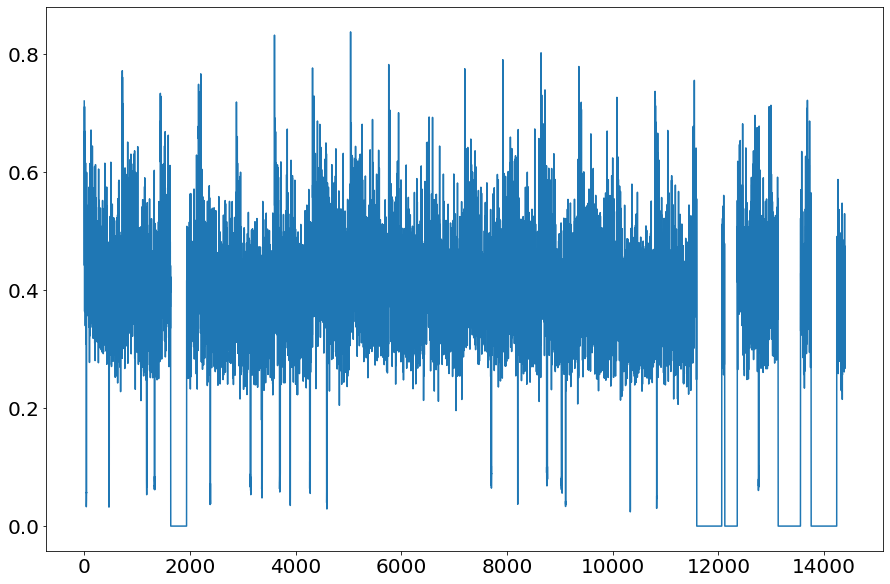

In [35]:
random.seed(77)

df['QC'] = pd.read_csv('../csv/S2_Urban_QC.csv')
lent = df['QC'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QC'][init1[i]:init1[i]+leng1[i]] = df['QC'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QC'][init2[i]:init2[i]+leng2[i]] = df['QC'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QC'][init3[i]:init3[i]+leng3[i]] = df['QC'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QC'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [36]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 


In [37]:
from sklearn.model_selection import train_test_split

# choose a number of time steps
n_steps = 5
# split into samples
X_QoE, y_QoE = split_sequence(df['QoE'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])
    


In [38]:
n_features = 1
X_QoE = X_QoE.reshape((X_QoE.shape[0], X_QoE.shape[1], n_features))
#print(X_QoE)
# define model
model_QoE = Sequential()
model_QoE.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoE.add(Dense(1))
model_QoE.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoE, X_test_QoE, y_train_QoE, y_test_QoE = train_test_split(X_QoE, y_QoE, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoE = model_QoE.fit(X_train_QoE, y_train_QoE, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoE = model_QoE.predict(X_test_QoE, verbose=0)
print([yhat_QoE,y_test_QoE])

Epoch 1/150
2/2 [==============================] - 0s 43ms/step - loss: 0.0559
Epoch 2/150
2/2 [==============================] - 0s 36ms/step - loss: 0.0498
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0444
Epoch 4/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0397
Epoch 5/150
2/2 [==============================] - 0s 41ms/step - loss: 0.0356
Epoch 6/150
2/2 [==============================] - 0s 25ms/step - loss: 0.0320
Epoch 7/150
2/2 [==============================] - 0s 24ms/step - loss: 0.0288
Epoch 8/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0260
Epoch 9/150
2/2 [==============================] - 0s 28ms/step - loss: 0.0235
Epoch 10/150
2/2 [==============================] - 0s 33ms/step - loss: 0.0214
Epoch 11/150
2/2 [==============================] - 0s 24ms/step - loss: 0.0195
Epoch 12/150
2/2 [==============================] - 0s 27ms/step - loss: 0.0178
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 40ms/step - loss: 0.0050
Epoch 104/150
2/2 [==============================] - 0s 47ms/step - loss: 0.0050
Epoch 105/150
2/2 [==============================] - 0s 41ms/step - loss: 0.0050
Epoch 106/150
2/2 [==============================] - 0s 60ms/step - loss: 0.0050
Epoch 107/150
2/2 [==============================] - 0s 56ms/step - loss: 0.0050
Epoch 108/150
2/2 [==============================] - 0s 43ms/step - loss: 0.0050
Epoch 109/150
2/2 [==============================] - 0s 32ms/step - loss: 0.0050
Epoch 110/150
2/2 [==============================] - 0s 29ms/step - loss: 0.0050
Epoch 111/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0050
Epoch 112/150
2/2 [==============================] - 0s 30ms/step - loss: 0.0050
Epoch 113/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0050
Epoch 114/150
2/2 [==============================] - 0s 30ms/step - loss: 0.0050
Epoch 115/150
2/2 [=======================

dict_keys(['loss'])


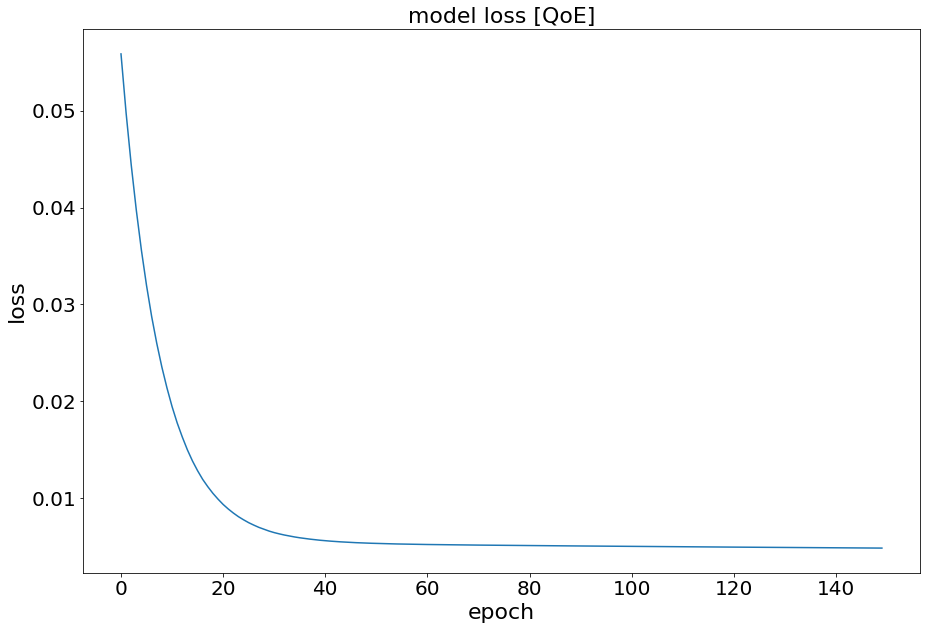

In [39]:
# list all data in history
print(history_QoE.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoE.history['loss'])
plt.title('model loss [QoE]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.savefig('../figure/S2Urban-model_QoE_loss-mse.png', format='png',bbox_inches='tight')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.194266  0.465103  0.270837
1     0.205870  0.462140  0.256270
2     0.216879  0.346070  0.129191
3     0.226500  0.433863  0.207364
4     0.238325  0.407196  0.168872
...        ...       ...       ...
3594  0.221122  0.154120  0.067002
3595  0.219207  0.173735  0.045473
3596  0.219665  0.267905  0.048240
3597  0.222825  0.157637  0.065188
3598  0.219803  0.238632  0.018830

[3599 rows x 3 columns]


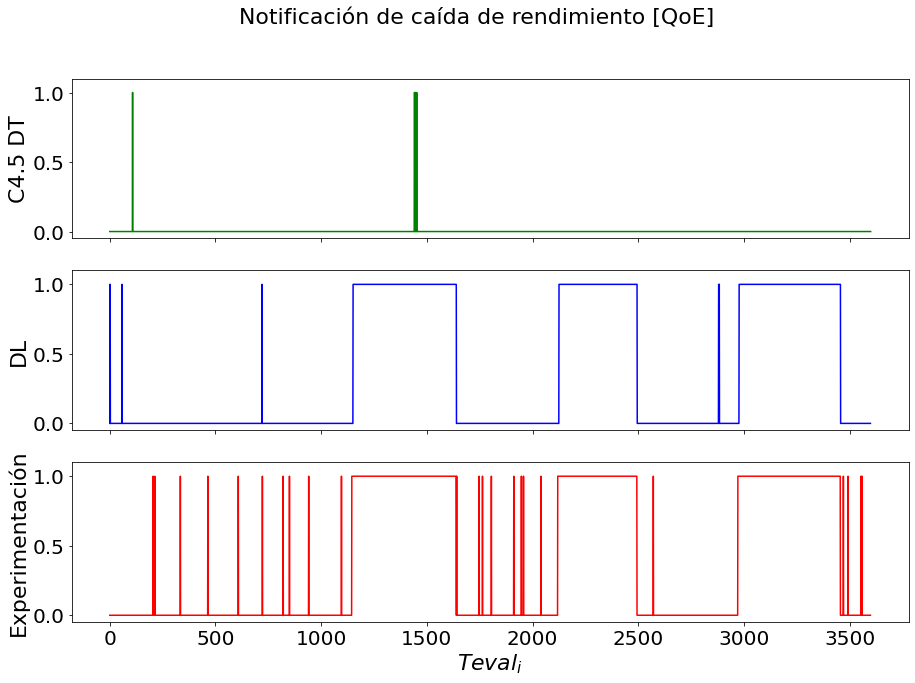

In [40]:
res_QoE = pd.DataFrame()
res_QoE['yhat'] = yhat_QoE.ravel()
res_QoE['y_test'] = y_test_QoE
res_QoE['diff'] = abs(res_QoE['yhat']-res_QoE['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoE)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoE['yhat'].shape[0]):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoE['yhat'][i] < res_QoE['y_test'][i-1]*th or res_QoE['yhat'][i] == res_QoE['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoE['y_test'][i] < res_QoE['y_test'][i-1]*th or res_QoE['y_test'][i] == res_QoE['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(notif_paper,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('C4.5 DT', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(x,notif2,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('Experimentación', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Urban-NotificationsQoE.png', format='png',bbox_inches='tight')

plt.show()


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2212
FP: 10
FN: 41
TP: 1336
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2222
           1       0.99      0.97      0.98      1377

    accuracy                           0.99      3599
   macro avg       0.99      0.98      0.98      3599
weighted avg       0.99      0.99      0.99      3599



In [42]:


notif_paper2 = notif_paper.pop()



tn, fp, fn, tp = confusion_matrix(notif2, notif_paper).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif_paper))

TN: 2221
FP: 1
FN: 1373
TP: 4
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2222
           1       0.80      0.00      0.01      1377

    accuracy                           0.62      3599
   macro avg       0.71      0.50      0.38      3599
weighted avg       0.69      0.62      0.47      3599



In [43]:
print('************Diferencias Testing [QoE] **************')
print(max(res_QoE['diff']))
#print(min(res_QoE['diff']))
print(sum(res_QoE['diff'])/len(res_QoE))
print()

************Diferencias Testing [QoE] **************
0.3248037340179153
0.09198545129031616



In [44]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoI, y_QoI = split_sequence(df['QoI'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [45]:
n_features = 1
X_QoI = X_QoI.reshape((X_QoI.shape[0], X_QoI.shape[1], n_features))
#print(X_QoI)
# define model
model_QoI = Sequential()
model_QoI.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoI.add(Dense(1))
model_QoI.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoI, X_test_QoI, y_train_QoI, y_test_QoI = train_test_split(X_QoI, y_QoI, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoI = model_QoI.fit(X_train_QoI, y_train_QoI, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoI = model_QoI.predict(X_test_QoI, verbose=0)
print([yhat_QoI,y_test_QoI])

Epoch 1/150
2/2 [==============================] - 0s 36ms/step - loss: 0.2015
Epoch 2/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1823
Epoch 3/150
2/2 [==============================] - 0s 28ms/step - loss: 0.1652
Epoch 4/150
2/2 [==============================] - 0s 18ms/step - loss: 0.1501
Epoch 5/150
2/2 [==============================] - 0s 27ms/step - loss: 0.1366
Epoch 6/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1245
Epoch 7/150
2/2 [==============================] - 0s 54ms/step - loss: 0.1137
Epoch 8/150
2/2 [==============================] - 0s 47ms/step - loss: 0.1041
Epoch 9/150
2/2 [==============================] - 0s 38ms/step - loss: 0.0955
Epoch 10/150
2/2 [==============================] - 0s 36ms/step - loss: 0.0878
Epoch 11/150
2/2 [==============================] - 0s 45ms/step - loss: 0.0808
Epoch 12/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0747
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 40ms/step - loss: 0.0197
Epoch 104/150
2/2 [==============================] - 0s 33ms/step - loss: 0.0196
Epoch 105/150
2/2 [==============================] - 0s 46ms/step - loss: 0.0196
Epoch 106/150
2/2 [==============================] - 0s 38ms/step - loss: 0.0195
Epoch 107/150
2/2 [==============================] - 0s 37ms/step - loss: 0.0195
Epoch 108/150
2/2 [==============================] - 0s 50ms/step - loss: 0.0195
Epoch 109/150
2/2 [==============================] - 0s 24ms/step - loss: 0.0194
Epoch 110/150
2/2 [==============================] - 0s 38ms/step - loss: 0.0194
Epoch 111/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0194
Epoch 112/150
2/2 [==============================] - 0s 25ms/step - loss: 0.0193
Epoch 113/150
2/2 [==============================] - 0s 37ms/step - loss: 0.0193
Epoch 114/150
2/2 [==============================] - 0s 28ms/step - loss: 0.0193
Epoch 115/150
2/2 [=======================

dict_keys(['loss'])


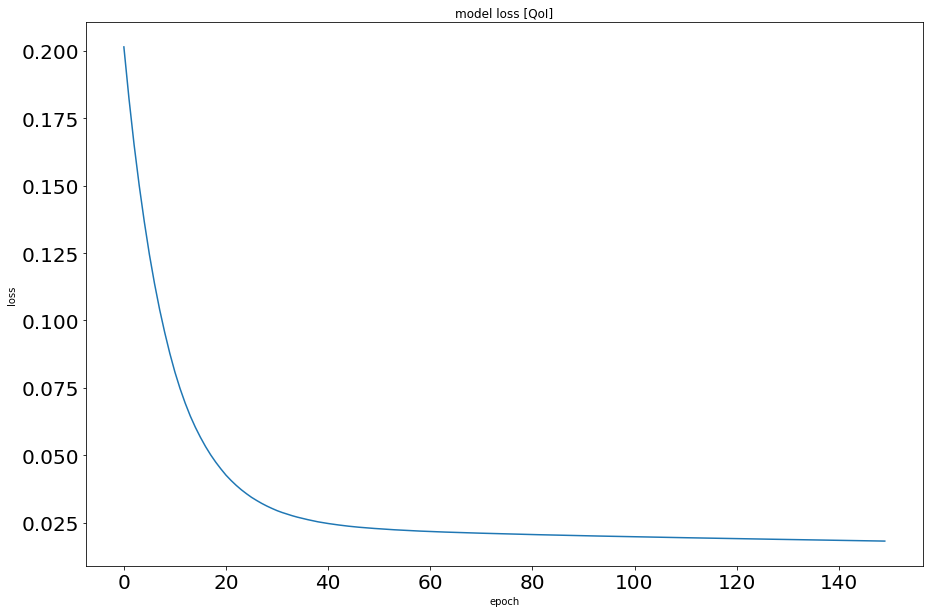

In [46]:
# list all data in history
print(history_QoI.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoI.history['loss'])
plt.title('model loss [QoI]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('../figure/S2Urban-model_QoI_loss-mse.png', format='png',bbox_inches='tight')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.427977  0.602149  0.174172
1     0.433837  0.565427  0.131590
2     0.435775  0.508884  0.073109
3     0.433535  0.502188  0.068654
4     0.435932  0.476336  0.040404
...        ...       ...       ...
3594  0.418633  0.406349  0.012284
3595  0.414954  0.436251  0.021296
3596  0.418243  0.492555  0.074312
3597  0.422393  0.442395  0.020002
3598  0.418925  0.482935  0.064010

[3599 rows x 3 columns]


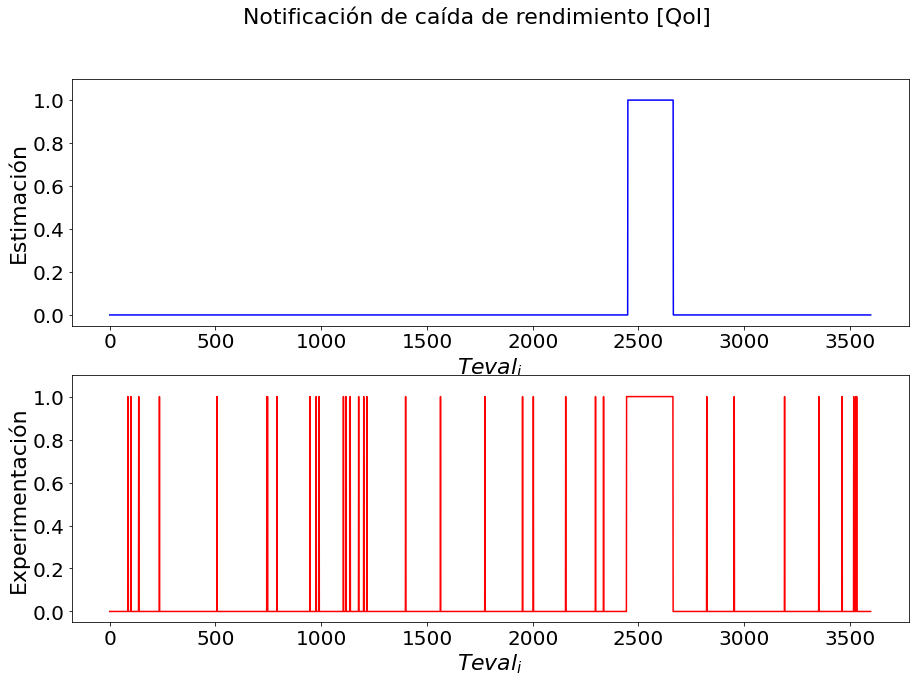

In [47]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoI['yhat'].shape[0]):
    #print([res_QoI['yhat'][i], res_QoI['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoI['yhat'][i] < res_QoI['y_test'][i-1]*th or res_QoI['yhat'][i] == res_QoI['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoI['y_test'][i] < res_QoI['y_test'][i-1]*th or res_QoI['y_test'][i] == res_QoI['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoI]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Urban-NotificationsQoI.png', format='png',bbox_inches='tight')

plt.show()


In [48]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3345
FP: 1
FN: 39
TP: 214
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3346
           1       1.00      0.85      0.91       253

    accuracy                           0.99      3599
   macro avg       0.99      0.92      0.95      3599
weighted avg       0.99      0.99      0.99      3599



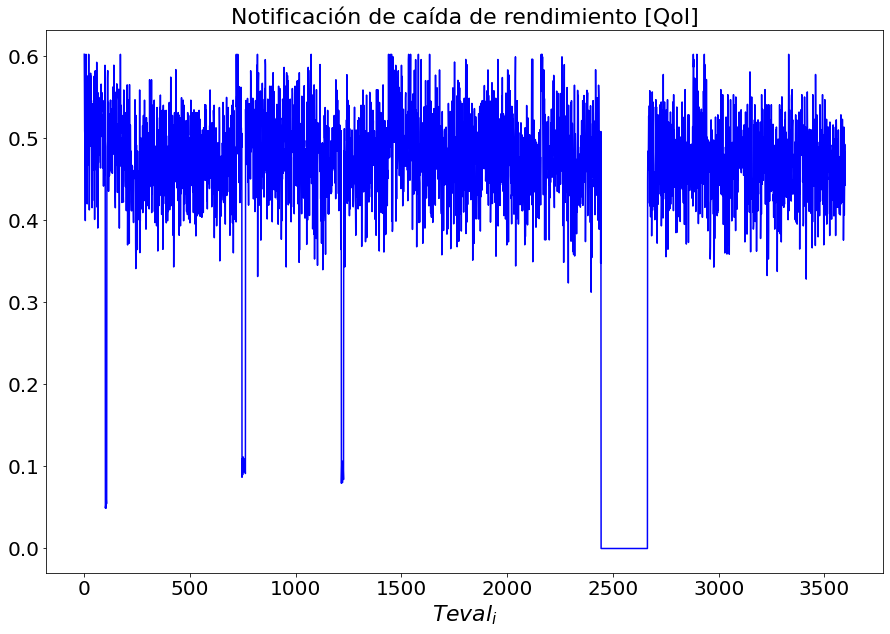

In [49]:
fig = plt.figure(figsize=(15,10))
plt.plot(res_QoI['y_test'],c='b')
#plt.plot(c_v)
plt.title('Notificación de caída de rendimiento [QoI]',fontsize=22)
plt.xlabel('$Teval_i$',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

          yhat    y_test      diff
0     0.427977  0.602149  0.174172
1     0.433837  0.565427  0.131590
2     0.435775  0.508884  0.073109
3     0.433535  0.502188  0.068654
4     0.435932  0.476336  0.040404
...        ...       ...       ...
3594  0.418633  0.406349  0.012284
3595  0.414954  0.436251  0.021296
3596  0.418243  0.492555  0.074312
3597  0.422393  0.442395  0.020002
3598  0.418925  0.482935  0.064010

[3599 rows x 3 columns]


In [51]:
print('************Diferencias Testing [QoI] **************')
print(max(res_QoI['diff']))
#print(min(res_QoI['diff']))
print(sum(res_QoI['diff'])/len(res_QoI))
print()

************Diferencias Testing [QoI] **************
0.41982319951057434
0.07671112437086565



In [52]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoD, y_QoD = split_sequence(df['QoD'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QoD[i], y_QoD[i])

In [53]:
n_features = 1
X_QoD = X_QoD.reshape((X_QoD.shape[0], X_QoD.shape[1], n_features))
#print(X_QoD)
# define model
model_QoD = Sequential()
model_QoD.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoD.add(Dense(1))
model_QoD.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoD, X_test_QoD, y_train_QoD, y_test_QoD = train_test_split(X_QoD, y_QoD, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoD = model_QoD.fit(X_train_QoD, y_train_QoD, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
#print([yhat_QoD,y_test_QoD])


Epoch 1/150
2/2 [==============================] - 0s 24ms/step - loss: 0.3109
Epoch 2/150
2/2 [==============================] - 0s 18ms/step - loss: 0.2742
Epoch 3/150
2/2 [==============================] - 0s 19ms/step - loss: 0.2425
Epoch 4/150
2/2 [==============================] - 0s 23ms/step - loss: 0.2147
Epoch 5/150
2/2 [==============================] - 0s 17ms/step - loss: 0.1906
Epoch 6/150
2/2 [==============================] - 0s 31ms/step - loss: 0.1694
Epoch 7/150
2/2 [==============================] - 0s 19ms/step - loss: 0.1508
Epoch 8/150
2/2 [==============================] - 0s 23ms/step - loss: 0.1347
Epoch 9/150
2/2 [==============================] - 0s 26ms/step - loss: 0.1207
Epoch 10/150
2/2 [==============================] - 0s 31ms/step - loss: 0.1081
Epoch 11/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0972
Epoch 12/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0876
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 22ms/step - loss: 0.0158
Epoch 104/150
2/2 [==============================] - 0s 35ms/step - loss: 0.0157
Epoch 105/150
2/2 [==============================] - 0s 45ms/step - loss: 0.0157
Epoch 106/150
2/2 [==============================] - 0s 33ms/step - loss: 0.0157
Epoch 107/150
2/2 [==============================] - 0s 39ms/step - loss: 0.0156
Epoch 108/150
2/2 [==============================] - 0s 37ms/step - loss: 0.0156
Epoch 109/150
2/2 [==============================] - 0s 40ms/step - loss: 0.0156
Epoch 110/150
2/2 [==============================] - 0s 29ms/step - loss: 0.0155
Epoch 111/150
2/2 [==============================] - 0s 39ms/step - loss: 0.0155
Epoch 112/150
2/2 [==============================] - 0s 31ms/step - loss: 0.0155
Epoch 113/150
2/2 [==============================] - 0s 31ms/step - loss: 0.0154
Epoch 114/150
2/2 [==============================] - 0s 27ms/step - loss: 0.0154
Epoch 115/150
2/2 [=======================

In [54]:
yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
print([yhat_QoD,y_test_QoD])

[array([[0.5152132 ],
       [0.50127053],
       [0.50426716],
       ...,
       [0.5553619 ],
       [0.5559219 ],
       [0.55813944]], dtype=float32), array([0.35368983, 0.55698854, 0.58666342, ..., 0.58352385, 0.60198045,
       0.59587436])]


dict_keys(['loss'])


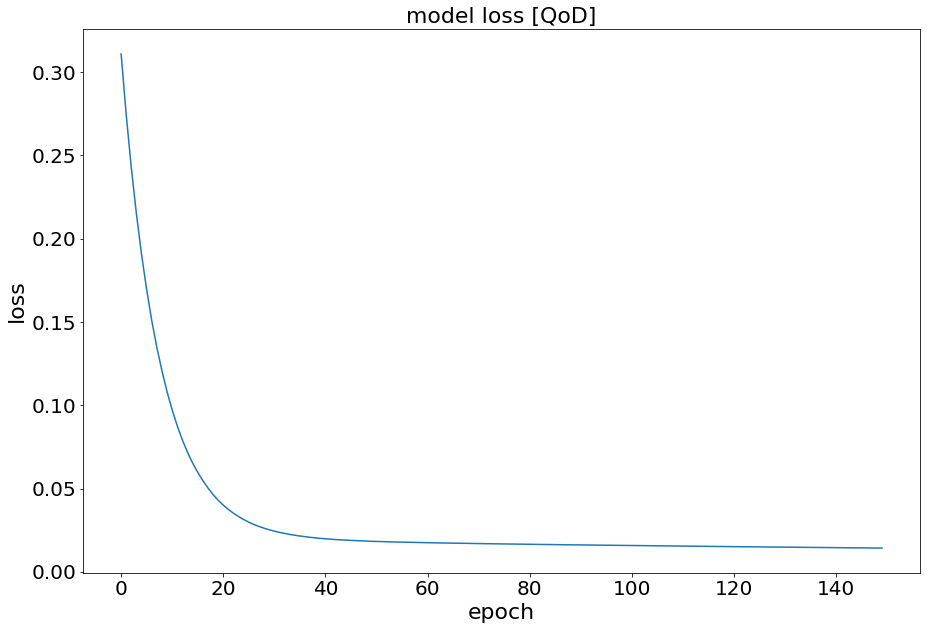

In [55]:
# list all data in history
print(history_QoD.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoD.history['loss'])
plt.title('model loss [QoD]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Urban-model_QoD_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.515213  0.353690  0.161523
1     0.501271  0.556989  0.055718
2     0.504267  0.586663  0.082396
3     0.503254  0.586831  0.083578
4     0.498366  0.605547  0.107181
...        ...       ...       ...
3594  0.554063  0.580812  0.026749
3595  0.554134  0.605069  0.050934
3596  0.555362  0.583524  0.028162
3597  0.555922  0.601980  0.046059
3598  0.558139  0.595874  0.037735

[3599 rows x 3 columns]


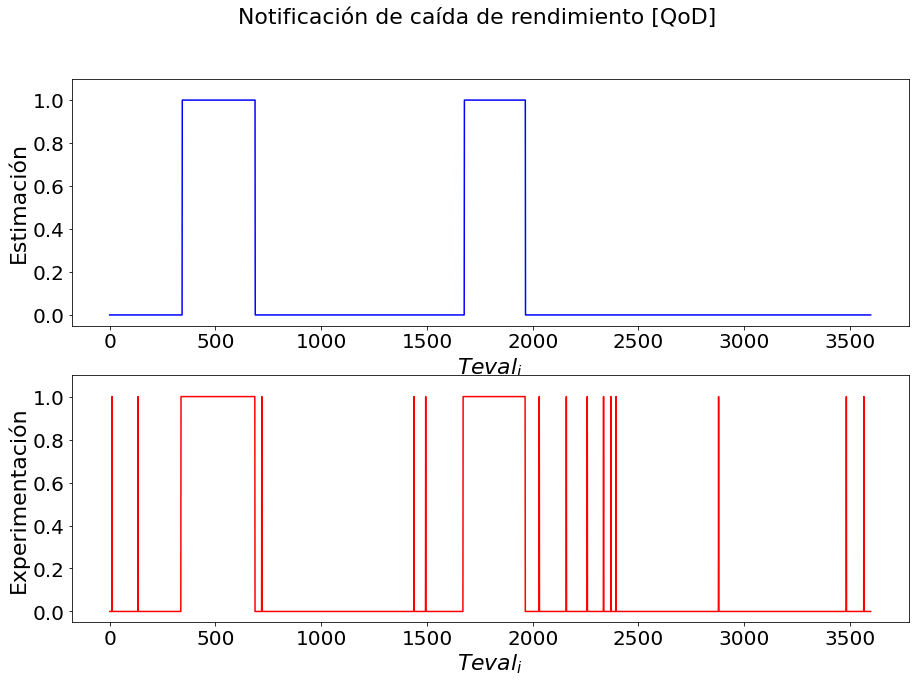

In [56]:
res_QoD = pd.DataFrame()
res_QoD['yhat'] = yhat_QoD.ravel()
res_QoD['y_test'] = y_test_QoD
res_QoD['diff'] = abs(res_QoD['yhat']-res_QoD['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoD)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoD['yhat'].shape[0]):
    #print([res_QoD['yhat'][i], res_QoD['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoD['yhat'][i] < res_QoD['y_test'][i-1]*th or res_QoD['yhat'][i] == res_QoD['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoD['y_test'][i] < res_QoD['y_test'][i-1]*th or res_QoD['y_test'][i] == res_QoD['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoD]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Urban-NotificationsQoD.png', format='png',bbox_inches='tight')

plt.show()

In [57]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2939
FP: 2
FN: 26
TP: 632
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2941
           1       1.00      0.96      0.98       658

    accuracy                           0.99      3599
   macro avg       0.99      0.98      0.99      3599
weighted avg       0.99      0.99      0.99      3599



In [58]:
print('************Diferencias Testing [QoD] **************')
print(max(res_QoD['diff']))
#print(min(res_QoD['diff']))
print(sum(res_QoD['diff'])/len(res_QoD))
print()

************Diferencias Testing [QoD] **************
0.5602169036865234
0.09995234610304912



In [59]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QC, y_QC = split_sequence(df['QC'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QC[i], y_QC[i])

In [60]:
n_features = 1
X_QC = X_QC.reshape((X_QC.shape[0], X_QC.shape[1], n_features))
#print(X_QC)
# define model
model_QC = Sequential()
model_QC.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QC.add(Dense(1))
model_QC.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QC, X_test_QC, y_train_QC, y_test_QC = train_test_split(X_QC, y_QC, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QC = model_QC.fit(X_train_QC, y_train_QC, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QC = model_QC.predict(X_test_QC, verbose=0)
#print([yhat_QC,y_test_QC])


Epoch 1/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1383
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.1225
Epoch 3/150
2/2 [==============================] - 0s 12ms/step - loss: 0.1086
Epoch 4/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0965
Epoch 5/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0859
Epoch 6/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0766
Epoch 7/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0684
Epoch 8/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0613
Epoch 9/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0551
Epoch 10/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0495
Epoch 11/150
2/2 [==============================] - 0s 18ms/step - loss: 0.0447
Epoch 12/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0405
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 16ms/step - loss: 0.0099
Epoch 104/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0099
Epoch 105/150
2/2 [==============================] - 0s 29ms/step - loss: 0.0099
Epoch 106/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0099
Epoch 107/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0099
Epoch 108/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0099
Epoch 109/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 110/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 111/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0098
Epoch 112/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0098
Epoch 113/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0098
Epoch 114/150
2/2 [==============================] - 0s 17ms/step - loss: 0.0098
Epoch 115/150
2/2 [=======================

In [61]:
yhat_QC = model_QC.predict(X_test_QC, verbose=0)
print([yhat_QC,y_test_QC])

[array([[0.39325842],
       [0.4076974 ],
       [0.4279111 ],
       ...,
       [0.38525224],
       [0.3791232 ],
       [0.38112158]], dtype=float32), array([0.69755732, 0.73721462, 0.4919525 , ..., 0.340106  , 0.34344793,
       0.46628309])]


dict_keys(['loss'])


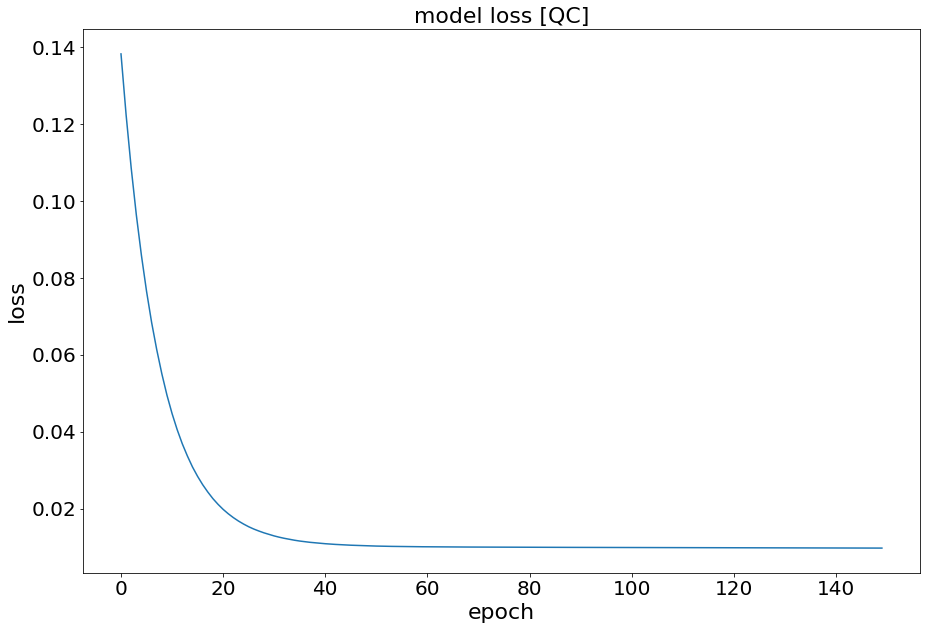

In [62]:
# list all data in history
print(history_QC.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QC.history['loss'])
plt.title('model loss [QC]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Urban-model_QC_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.393258  0.697557  0.304299
1     0.407697  0.737215  0.329517
2     0.427911  0.491952  0.064041
3     0.433028  0.596702  0.163674
4     0.444255  0.513315  0.069060
...        ...       ...       ...
3594  0.385863  0.267402  0.118461
3595  0.381880  0.474562  0.092682
3596  0.385252  0.340106  0.045146
3597  0.379123  0.343448  0.035675
3598  0.381122  0.466283  0.085162

[3599 rows x 3 columns]


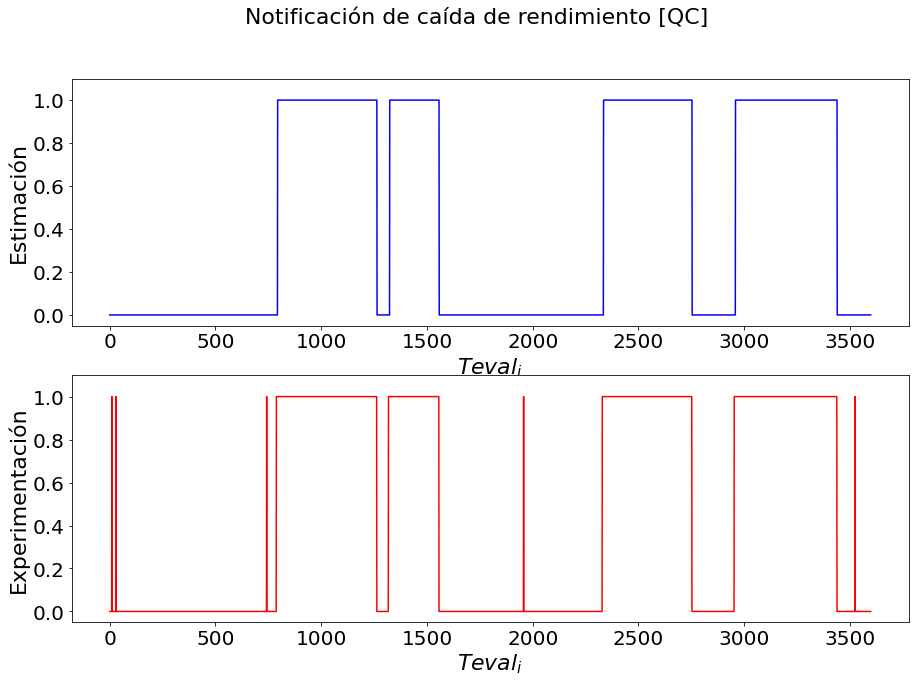

In [63]:
res_QC = pd.DataFrame()
res_QC['yhat'] = yhat_QC.ravel()
res_QC['y_test'] = y_test_QC
res_QC['diff'] = abs(res_QC['yhat']-res_QC['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QC)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QC['yhat'].shape[0]):
    #print([res_QC['yhat'][i], res_QC['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QC['yhat'][i] < res_QC['y_test'][i-1]*th or res_QC['yhat'][i] == res_QC['yhat'][i-1] ):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QC['y_test'][i] < res_QC['y_test'][i-1]*th or res_QC['y_test'][i] == res_QC['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QC]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Urban-NotificationsQC.png', format='png',bbox_inches='tight')

plt.show()

In [64]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 1966
FP: 4
FN: 29
TP: 1600
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1970
           1       1.00      0.98      0.99      1629

    accuracy                           0.99      3599
   macro avg       0.99      0.99      0.99      3599
weighted avg       0.99      0.99      0.99      3599

